# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Fathur Rahman
- **Email:**  M319B4KY1435@bangkit.academy
- **ID Dicoding:** fatman88_99

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan sepeda berdasarkan pada  4 musim ?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Apakah Terjadi Peningkatan penggunaan sepeda dari rentang tahun 2011-2012 ?
- Berapakah banyak pengguna pelanggan penggunaan sepeda dengan membandingkan pengguna baru sepeda ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data yang dimasukkan ialah (day.csv) dan (hour.csv). dari tabel di atas memunculkan 5 baris pertama.

### Assessing Data

In [4]:
# Meilhat informasi data  dalam tabel  day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Meilhat informasi  data  dalam tabel hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Mengecek missing value dalam dataframe bike sharing dalam tabel day.csv
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
# Mengecek duplikasi dalam dataframe bike sharing dalam tabel day.csv
print("Jumlah duplikasi: ",day_df.duplicated().sum())


Jumlah duplikasi:  0


In [8]:
# Mengecek missing value dalam dataframe bike sharing dalam tabel hour.csv
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
# Mengecek duplikasi dalam dataframe bike sharing dalam tabel hour.csv
print("Jumlah duplikasi: ",hour_df.duplicated().sum())


Jumlah duplikasi:  0


In [10]:
# Melihat deskripsi-statistik DataFrame bike sharing dalam tabel day.csv
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Melihat deskripsi-statistik DataFrame bike sharing dalam tabel hour.csv
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Merubah dalam tipe data pada dteday, perlu diubah menjadi tipe data datetime
- Tidak ada data yang terdapat missing value dan duplikasi dalam kedua tabel

### Cleaning Data

In [12]:
# Mengubah Tipe data menjadi datetime pada kolom 'dteday'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
# Mengubah nama pada kolom-kolom tertentu agar mudah dipahami
day_df.rename(columns={'dteday':'date', 'yr':'year','mnth':'month', 'weekday': 'days','weathersit':'weather_situation','cnt':'count'},inplace=True)

hour_df.rename(columns={'dteday':'date', 'yr':'year','mnth':'month', 'hr': 'hours','weekday': 'days','weathersit':'weather_situation','cnt':'count'},inplace=True)

In [14]:
# Mengubah Tipe data menjadi string pada kolom 'year', 'month', 'season', dll
column = ['year', 'month', 'season', 'days', 'weather_situation', 'holiday', 'workingday']
day_df[column] =  day_df[column].astype(str)
hour_df[column] =  hour_df[column].astype(str)

In [15]:
# Mengubah angka dalam data pada kolom  menjadi string
day_df['month'].replace({'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5':'May', '6':'June', '7': 'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}, inplace=True)
hour_df['month'].replace({'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5':'May', '6':'June', '7': 'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}, inplace=True)

day_df['season'].replace({ '1': 'Spring','2': 'Summer', '3': 'Fall', '4': 'Winter'}, inplace=True)
hour_df['season'].replace({ '1': 'Spring','2': 'Summer', '3': 'Fall', '4': 'Winter'}, inplace=True)

day_df['year'].replace({'0': '2011', '1': '2012'}, inplace=True)
hour_df['year'].replace({'0': '2011', '1': '2012'}, inplace=True)

day_df['days'].replace({'0': 'Sunday', '1': 'Monday', '2': 'Thursday', '3': 'Wednesday', '4':'Tuesday', '5':'Friday', '6': 'Saturday'}, inplace=True)
hour_df['days'].replace({'0': 'Sunday', '1': 'Monday', '2': 'Thursday', '3': 'Wednesday', '4':'Tuesday', '5':'Friday', '6': 'Saturday'}, inplace=True)

day_df['weather_situation'].replace({'1': 'Clear', '2': 'Cloudy', '3': 'Rain'}, inplace=True)
hour_df['weather_situation'].replace({'1': 'Clear', '2': 'Cloudy', '3': 'Rain'}, inplace=True)


day_df['holiday'].replace({'0': 'No', '1': 'Yes'}, inplace=True)
hour_df['holiday'].replace({'0': 'No', '1': 'Yes'}, inplace=True)

day_df['workingday'].replace({'0': 'No', '1': 'Yes'}, inplace=True)
hour_df['workingday'].replace({'0': 'No', '1': 'Yes'}, inplace=True)




<ipython-input-15-6845f978c7e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['month'].replace({'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5':'May', '6':'June', '7': 'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}, inplace=True)
<ipython-input-15-6845f978c7e0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will nev

In [16]:
# Hasil setelah diubah dalam tabel day.csv
day_df.head(10)

,instant,date,season,year,month,holiday,days,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,No,Saturday,No,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,No,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Thursday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,2011,January,No,Tuesday,Yes,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,2011,January,No,Friday,Yes,Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,2011,January,No,Saturday,No,Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,2011,January,No,Sunday,No,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,2011,January,No,Monday,Yes,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [17]:
# Hasil diubah dalam tabel hour.csv
hour_df.head(10)

,instant,date,season,year,month,hours,holiday,days,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,Spring,2011,January,5,No,Saturday,No,Cloudy,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,Spring,2011,January,6,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,Spring,2011,January,7,No,Saturday,No,Clear,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,Spring,2011,January,8,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,Spring,2011,January,9,No,Saturday,No,Clear,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Telah dirubah tipe data pada dteday
- Telah dirubah juga dalam rows dalam pada beberapa kolom agar mudah

## Exploratory Data Analysis (EDA)

In [18]:
day_df.describe()

,instant,date,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [19]:
# Perhitungan Jumlah penggunaan sepeda berdasarkan cuaca
day_df.groupby('weather_situation', observed=True)['count'].sum().reset_index().head(3)

,weather_situation,count
0,Clear,2257952
1,Cloudy,996858
2,Rain,37869


In [20]:
# Perhitungan Jumlah penggunaan sepeda berdasarkan musim
day_df.groupby('season', observed=True)['count'].sum().reset_index().head(4)

,season,count
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


In [21]:
hour_df.describe()

,instant,date,hours,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [22]:
# Pengelompokkan registerd dan casual berdasarkan waktu(pada jam berapa)
hour_df.groupby(by='hours').agg({
    'registered': 'sum',
    'casual': 'sum'
})

,registered,casual
hours,,
0,31755,7375
1,19455,4709
2,12940,3412
3,6281,1893
4,3554,874
5,13249,1012
6,52115,3017
7,146134,8037
8,245240,15761


**Insight:**
- Dapat melihat informasi dari hubungan musim dan jumlah penggunaan sepeda
- Dapat melihat informasi dari hubungan cuada dan jumlah penggunaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana penggunaan sepeda berdasarkan pada  4 musim ?

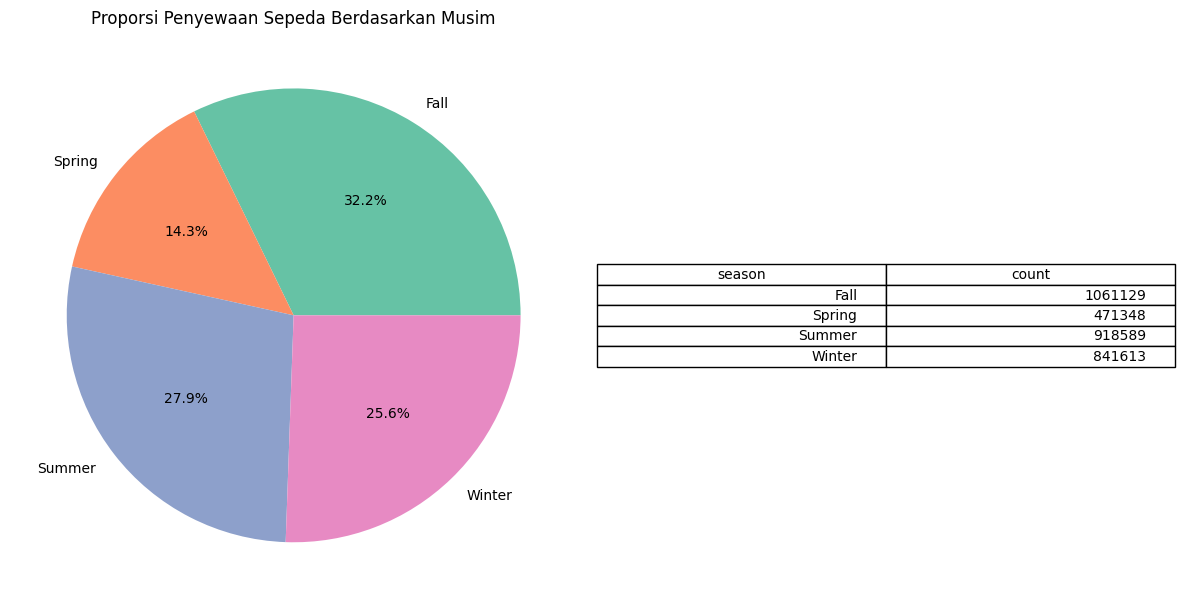

In [23]:
season_data = day_df.groupby('season')['count'].sum().reset_index()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Buat 2 kolom untuk pie chart dan tabel

colors_season = sns.color_palette('Set2', n_colors=4)
ax[0].pie(season_data['count'], labels=season_data['season'], autopct='%1.1f%%', colors=colors_season)



ax[0].set_title('Proporsi Penyewaan Sepeda Berdasarkan Musim')
ax[1].axis('tight')
ax[1].axis('off')
table_data = ax[1].table(cellText=season_data.values, colLabels=season_data.columns, loc='center')


plt.tight_layout()
plt.show()

### Pertanyaan 2:
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

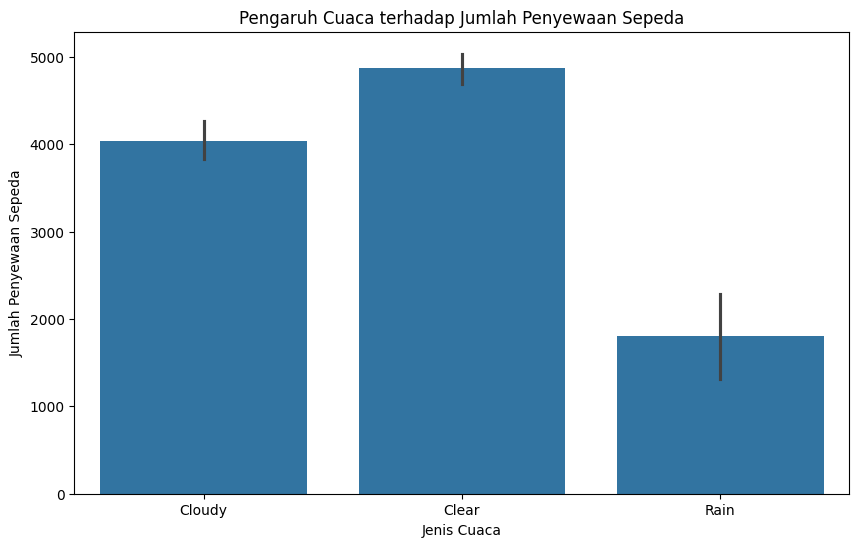

In [24]:
# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_situation', y='count', data=day_df)


plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Jenis Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 3:
- Apakah Terjadi Peningkatan penggunaan sepeda dari rentang tahun 2011-2012 ?

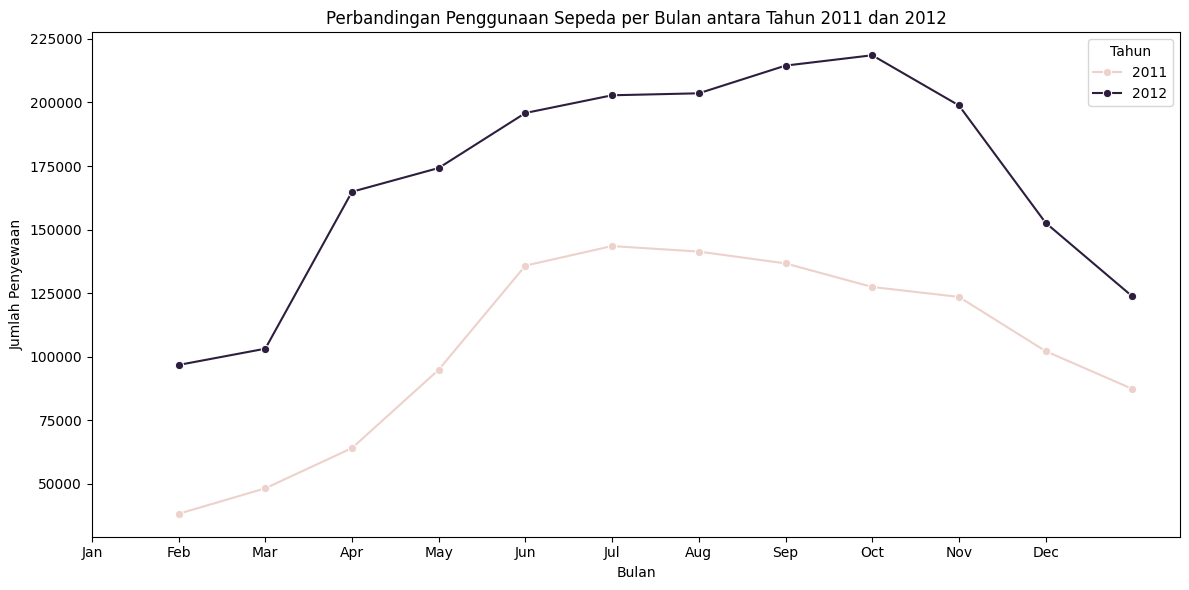

In [25]:
data_2011 = hour_df[hour_df['date'].dt.year == 2011].copy()
data_2012 = hour_df[hour_df['date'].dt.year == 2012].copy()


data_2011.loc[:, 'month'] = data_2011['date'].dt.month
data_2012.loc[:, 'month'] = data_2012['date'].dt.month


monthly_counts_2011 = data_2011.groupby('month')['count'].sum().reset_index()
monthly_counts_2012 = data_2012.groupby('month')['count'].sum().reset_index()

monthly_counts_2011['year'] = 2011
monthly_counts_2012['year'] = 2012
combined_counts = pd.concat([monthly_counts_2011, monthly_counts_2012], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_counts, x='month', y='count', hue='year', marker='o')


plt.title('Perbandingan Penggunaan Sepeda per Bulan antara Tahun 2011 dan 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Tahun')
plt.tight_layout()
plt.show()


### Pertanyaan 4:
- Berapakah banyak pengguna pelanggan penggunaan sepeda dengan membandingkan pengguna baru sepeda ?

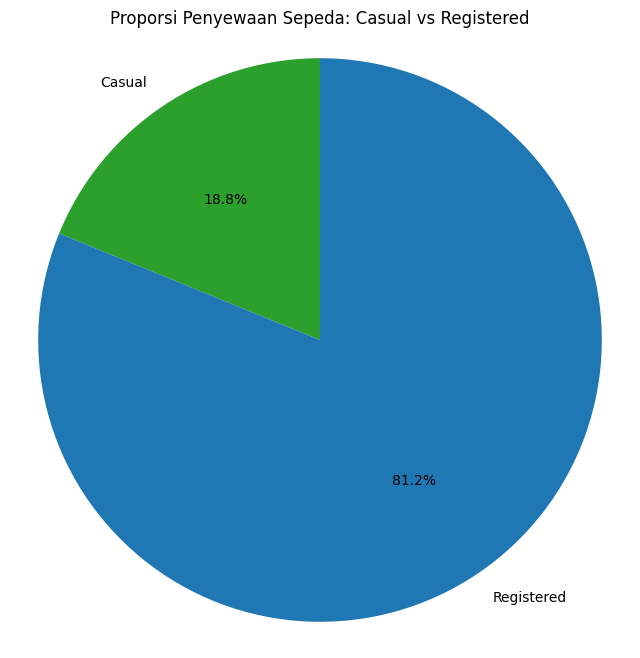

    User Type    Count
0      Casual   620017
1  Registered  2672662


In [26]:
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()


labels = ['Casual', 'Registered']
sizes = [total_casual, total_registered]
colors = ['#2ca02c', '#1f77b4']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Proporsi Penyewaan Sepeda: Casual vs Registered')
plt.show()

data = {
    'User Type': ['Casual', 'Registered'],
    'Count': [total_casual, total_registered]
}

total_counts_df = pd.DataFrame(data)
print(total_counts_df)


## Conclusion

Hasil Dari analisis dengan menggunakan dataset bike sharing, dapat diambil kesimpulannya yaitu,
- Penggunaan sepeda sangat berpengaruh pada musim hal ini sangat memengaruhi penggguna apkakah mereka akan memakai sepeda atau tidak, contoh penggunaan sepeda pada musim salju ( winter ) lebih sedikit dibandingkan musim panas ( summer ) ada beberapa faktor seperti, jalan akan menjadi licin dan bebahaya pada musim salju ketika memakai sepeda maka banyak pengguna enggan memakai dan juga cuaca yang sangat dingin memungkinkan pengguna sepeda sulit untuk keluar dengan kondisi seperti itu dengan salju yang lebat.
- Penyewaan sepeda terhadap cuaca juga sangat bergantung, hal ini bisa dilihat dari visualisasi data di mana ketika hari cerah ( Clear ) pengguna sepeda banyak berminat menggunakan sepeda ketika hendak pergi keluar dari rumah. Menggunakan sepeda juga sangat bermanfaat bagi kesehatan, dilihat dari segi kondisi cuaca pihak penyedia layanan sepeda perlu menyediakan sepeda yang cukup ketika kondisi cuaca cerah.
- Dilihat dari visualisasi perbandingan penggunaan  dari rentang 2011-2012 ( 2 tahun ), penyewaan sepeda mengalami peningkatan jauh signifikan pada tahun 2012 akan tetapi, pada tahun 2011 dan 2012 selalu mengalami penurunan di akhir bulan hal ini ada berbagai faktor dari kondisi cuaca dan musim yang dingin, sehingga sebagian pengguna enggan memakai sepeda.
- Persentasi pengguna lama( casual ) dan pendaftar baru ( registerd ), pendaftar baru mengalami peningkatan sebesar 81,2% jika dibandingkan pengguna lama, hal ini akan mengalami peningkatan penggunaan sepeda di tahun berikutnya berdasarkan data yang telah divisualisasikan.

Tren pengguna sepeda akan menngalami kenaikan pada tahun 2013 jika dilihat dari data sebagai acuan, pihak penyedia layanan perlu meningkatkan kualitas dan kuantitas dalam sepeda, hal ini perlu diperjelas karena pada musim salju perlu lebih perhatikan( maintainance ) agar pengguna baik-baik saja. pihak penyedia layanan sepeda perlu juga lebih memperhatikan sepeda ketika menyediakan sepeda ketika cuaca cerah atau musim yang pas seperti musim panas dan musim gugur agar mendapatkan keuntungan yang banyak.
